In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn.cluster import KMeans

(800, 800)


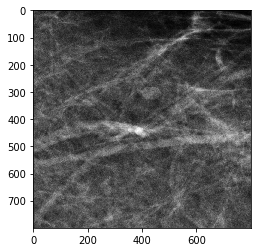

In [20]:
image = r"C:\Users\cory1\OneDrive\Documents\test-folder\B\image_10-14-2019_29.jpg"
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1ml = 500 - 250
x2ml = 800 + 250
z1ml = 900 - 250
z2ml = 1200 + 250
diffxml = x2ml - x1ml
diffzml = z2ml - z1ml

LMLOml = np.zeros((diffzml, diffxml))
for j in range(z1ml, z2ml):
    for k in range(x1ml, x2ml):
        LMLOml[j-z1ml,k-x1ml] = beginning_image[j,k]
        
plt.imshow(LMLOml, cmap = 'gray')
print(LMLOml.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO-imagecrop.jpg',LMLOml)
#this just cuts out the abnomaility

[]

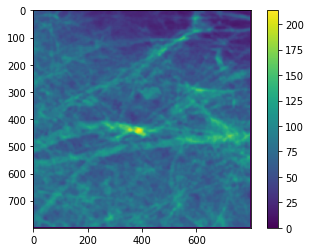

In [21]:
LMLO_density = np.zeros((diffzml,diffxml))
u = 5
for i in range(u, diffzml-u):
    for j in range(u, diffxml-u):
        
        lum = np.sum(LMLOml[i-u:i+u,j-u:j+u])/(len(LMLOml[i-u:i+u,j-u:j+u])**2)
        if 0 <= lum <= 255:
            LMLO_density[i,j] = lum
        else:
            LMLO_density[i,j] = 0
plt.imshow(LMLO_density, cmap = 'gray')
plt.imshow(LMLO_density[:,:])
plt.colorbar()
plt.plot()

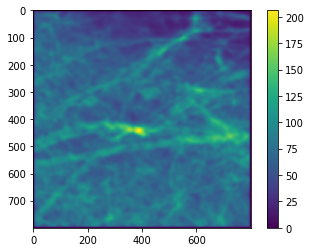

In [22]:
Blur_array = np.zeros((diffzml, diffxml))
transfer = np.zeros((diffzml, diffxml))
Blur_array[:,:] = ndimage.filters.gaussian_filter(LMLO_density, 4)
for ii in range(u, diffzml-u):
    for kk in range(u, diffxml-u):
        transfer[ii,kk] = Blur_array[ii,kk]
plt.imshow(transfer)
plt.colorbar()

In [45]:
slit = np.zeros((50,diffxml))
for ii in range(0, 50):
    for kk in range(0,diffxml):
        slit[ii,kk]=transfer[300+ii, kk]

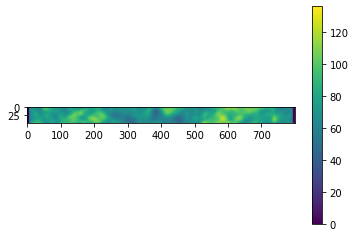

In [46]:
plt.imshow(slit)
plt.colorbar()

In [47]:
lum = []
lum_below = []
for kk in range(0, diffxml):
    lum.append(slit[25,kk]) 
    lum_below.append(slit[27,kk])
zaxis = list(range(0,diffxml))
dx = (transfer[25, 445] - transfer[25, 475]) * 0.5 / 255
dx2 = np.absolute(dx)
print(dx2)

0.003743362436499667


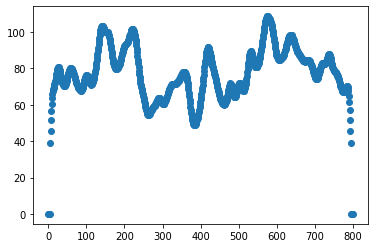

In [48]:
plt.scatter(zaxis, lum)

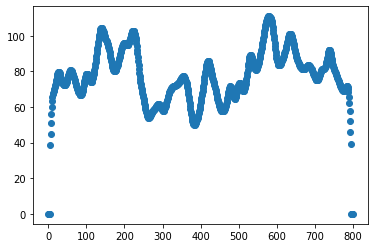

In [49]:
plt.scatter(zaxis, lum_below)

In [28]:
def boarder_points(array, grad, diffzml, diffxml, spac):
    clusterB = np.zeros((diffzml,diffxml))
    for ii in range(10,diffzml-10):
        for kk in range(10,diffxml-10):
            aa = boarders(array, ii, kk, grad,spac)
            if aa[0]> 0 :
                clusterB[aa[0],aa[1]] = 255
    return clusterB
            
    
def boarders(array, ii, kk, grad, spac):
        gradient = grad
        s = spac
        dx = np.absolute((array[ii, kk+s] - array[ii,kk-s]) * 0.5 / 255)
        dy = np.absolute((array[ii+s, kk] - array[ii-s, kk]) * 0.5 / 255)
        dXY = np.absolute((array[ii+s, kk+s] - array[ii-s, kk-s]) * 0.5 / 255)
        dxY = np.absolute((array[ii-s, kk+s] - array[ii+s, kk-s]) * 0.5 / 255)
        if dx >= gradient or dy >= gradient or dXY >= gradient or dxY >= gradient:
            return ii, kk
        else:
            return 0,0

In [29]:
transition = np.zeros((diffxml,diffzml, 20))
for jj in range(1,20):
    transition[:,:,jj] = boarder_points(transfer, ((jj+10)/1000), diffzml, diffxml, 1)
            
        


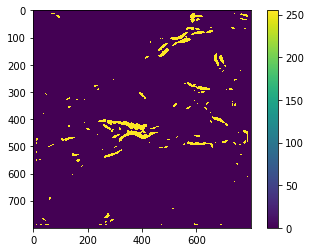

In [30]:
plt.imshow(transition[:,:,5])
plt.colorbar()

In [31]:
transition_reduction = np.zeros((diffxml,diffzml, 10))
total_transition = np.zeros((diffxml,diffzml))
for jj in range(0,9):
    transition_reduction[:,:,jj] = transition[:,:,(jj)]-transition[:,:,(jj+1)]

total_transition1 = transition[:,:,0]-transition[:,:,1]-transition[:,:,2]-transition[:,:,3]-transition[:,:,4]-transition[:,:,5]-transition[:,:,6]-transition[:,:,7]-transition[:,:,8]
total_transition2 = transition[:,:,8]+transition[:,:,7]+transition[:,:,6]+transition[:,:,5]+transition[:,:,4]+transition[:,:,3]+transition[:,:,2]+transition[:,:,1]+transition[:,:,0]

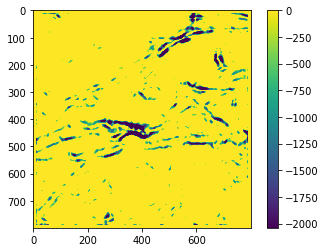

In [32]:
plt.imshow(total_transition1)
plt.colorbar()

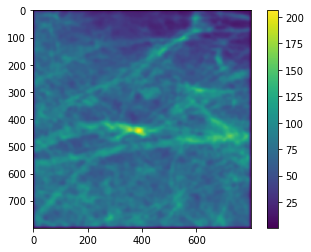

In [33]:
plt.imshow(Blur_array)
plt.colorbar()

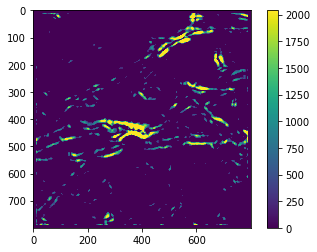

In [34]:
plt.imshow(total_transition2)
plt.colorbar()

In [35]:
def check(old_array, new_array, ii, kk):
    if old_array[ii,kk] > new_array[ii,kk]:
        w = old_array[ii,kk]
    else:
        w = new_array[ii,kk]
    return w

def alternation(old_array, new_array, diffxml,diffzml):
    clusterC = np.zeros((diffzml, diffxml))
    for ii in range(5,diffzml-5):
        for kk in range(5,diffxml-5):
            w  = check(old_array, new_array , ii, kk)
            clusterC[ii,kk] = w
    return clusterC  

In [36]:
p = alternation(LMLO_density, transfer, diffxml, diffzml)

In [37]:
difference = p - LMLO_density

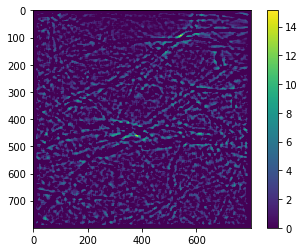

In [38]:
plt.imshow(difference)
plt.colorbar()

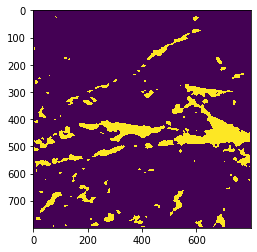

In [39]:
clusterD = np.zeros((diffzml,diffxml))
for ii in range(0,diffzml):
    for kk in range(0,diffxml):
        if LMLO_density[ii,kk] >= 100:
            clusterD[ii,kk] = 255

plt.imshow(clusterD)

In [40]:
lum_values = np.array(lum)
print(lum_values)

[  0.           0.           0.           0.           0.
  45.40688197  53.32378486  60.66380709  67.02153519  72.17067772
  76.06213919  78.78933841  80.53649907  81.52152904  81.95828786
  82.02911637  81.87546591  81.5992693   81.26954887  80.93016104
  80.60650018  80.31062396  80.04408801  79.80431549  79.58258047
  79.36823808  79.15029269  78.91872856  78.66570169  78.38661874
  78.08108294  77.75354145  77.41344209  77.07469096  76.75430562
  76.47039525  76.23976074  76.07564731  75.98602128  75.9727615
  76.03184105  76.15436098  76.32819908  76.53991759  76.7767032
  77.02802117  77.28692045  77.55075839  77.82129456  78.10412231
  78.40756164  78.7412672   79.114754    79.53588547  80.00926741
  80.53455809  81.1045515   81.70339739  82.30549507  82.87560854
  83.37074721  83.74373361  83.94799704  83.94289517  83.6985268
  83.1993032   82.44575947  81.45463733  80.25729655  78.8969105
  77.42471458  75.89595803  74.36581396  72.88561373  71.49978593
  70.24359153  69.1418

In [41]:
def finding_local_points(array):
    listx =[]
    listz =[]
    
    for ii in range(1,diffxml-1):
        y = (array[ii-1,25] - array[ii+1,25])*0.5/255
        if y <= 1:
            listx.append(ii)
            listz.append(y)
    return listx, listz
    
    

In [42]:
q = finding_local_points(transfer)

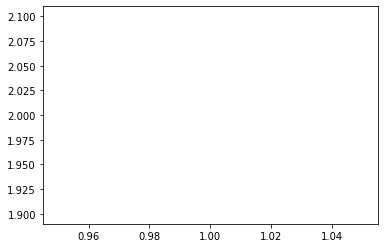

In [50]:
plt.plot(q[0], q[1])

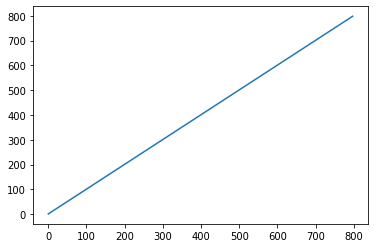

In [44]:
plt.plot(q)